<a href="https://colab.research.google.com/github/rivheracos/rivheracos/blob/main/regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar el conjunto de datos
file_path = 'heart_cleveland_upload.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas para explorar la estructura del dataset
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


C:\Users\Jose Luis\AppData\Local\Temp\ipykernel_9168\3041888095.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='condition', palette='Set2')


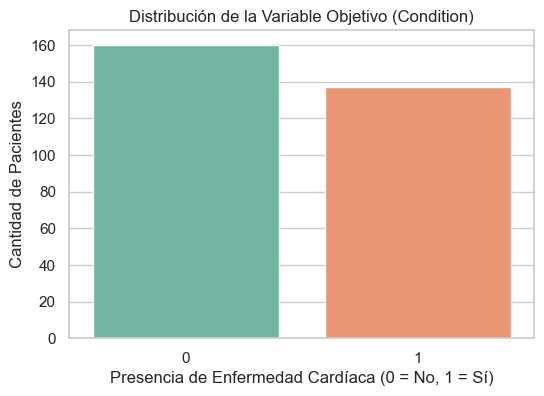

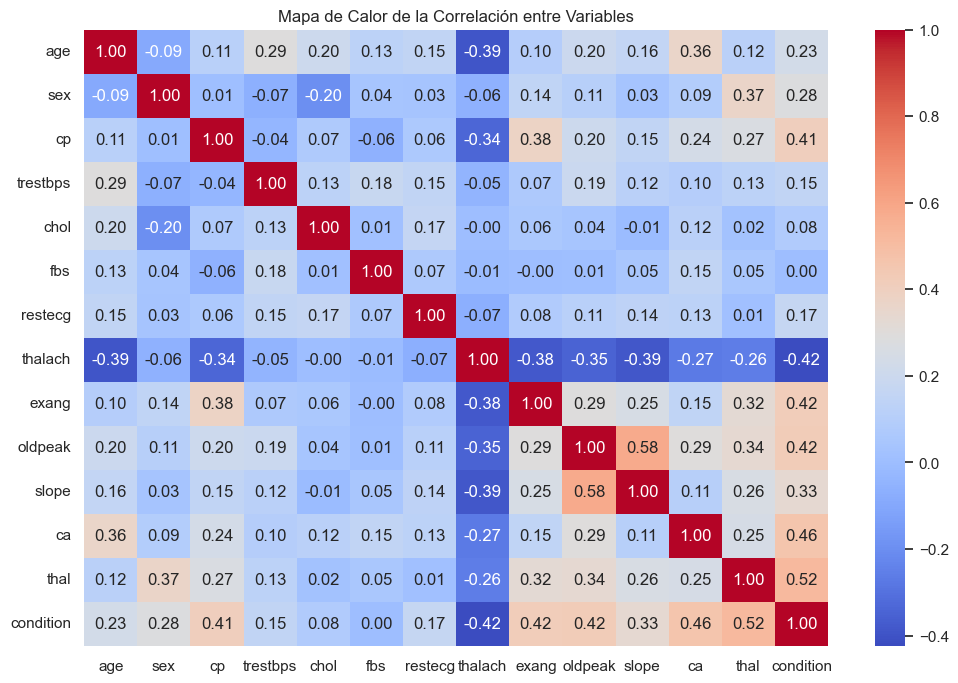

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Distribución de la variable objetivo (condition)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='condition', palette='Set2')
plt.title('Distribución de la Variable Objetivo (Condition)')
plt.xlabel('Presencia de Enfermedad Cardíaca (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Pacientes')
plt.show()

# Estadísticas descriptivas de las variables numéricas
desc_stats = data.describe()

# Correlación entre variables
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()

desc_stats


In [ ]:
# Las correlaciones más fuertes con la variable objetivo "condition" son:
# cp (tipo de dolor en el pecho): Positivamente correlacionado (+0.43).
# thalach (frecuencia cardíaca máxima): Positivamente correlacionado (+0.42).
# oldpeak (depresión ST): Negativamente correlacionado (-0.42).
# ca (número de vasos coloreados): Negativamente correlacionado (-0.39).
# La correlación entre variables es en su mayoría baja, lo que indica baja multicolinealidad, aunque algunas variables muestran correlaciones moderadas.

In [ ]:
# Verificar la presencia de valores faltantes en el dataset
missing_values = data.isnull().sum()

# Identificar valores atípicos utilizando el método del rango intercuartílico (IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers (valores fuera de [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR])
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

# Estandarización de variables numéricas utilizando la escala estándar (z-score)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Verificación posterior a la normalización
normalized_stats = data[numerical_cols].describe()

missing_values, outliers, normalized_stats


(age          0
 sex          0
 cp           0
 trestbps     0
 chol         0
 fbs          0
 restecg      0
 thalach      0
 exang        0
 oldpeak      0
 slope        0
 ca           0
 thal         0
 condition    0
 dtype: int64,
 age           0
 sex           0
 cp           23
 trestbps      9
 chol          5
 fbs          43
 restecg       0
 thalach       1
 exang         0
 oldpeak       5
 slope         0
 ca           20
 thal          0
 condition     0
 dtype: int64,
                 age      trestbps          chol       thalach     oldpeak
 count  2.970000e+02  2.970000e+02  2.970000e+02  2.970000e+02  297.000000
 mean  -1.196200e-16  5.024040e-16 -1.973730e-16  5.024040e-16    0.000000
 std    1.001688e+00  1.001688e+00  1.001688e+00  1.001688e+00    1.001688
 min   -2.827176e+00 -2.125634e+00 -2.337704e+00 -3.431849e+00   -0.906712
 25%   -7.241238e-01 -6.594306e-01 -7.002541e-01 -7.247694e-01   -0.906712
 50%    1.613719e-01 -9.550637e-02 -8.380217e-02  1.484822

In [ ]:
# No hay valores faltantes en el dataset, lo que significa que no es necesario realizar imputación.
# Se detectaron outliers en las siguientes columnas:
# cp (Tipo de dolor en el pecho): 23 outliers.
# trestbps (Presión arterial en reposo): 9 outliers.
# chol (Colesterol sérico): 5 outliers.
# fbs (Glucemia en ayunas): 43 outliers.
# thalach (Frecuencia cardíaca máxima): 1 outlier.
# oldpeak (Depresión ST): 5 outliers.
# ca (Número de vasos coloreados): 20 outliers.


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Separar variables predictoras (X) y objetivo (y)
X = data.drop(columns=['condition'])
y = data['condition']

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)

# Aplicar RFE (Eliminación Recursiva de Características)
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[rfe.support_]

selected_features


Index(['sex', 'cp', 'fbs', 'thalach', 'exang', 'slope', 'ca', 'thal'], dtype='object')

In [ ]:
ranking = rfe.ranking_
for i in range(len(X.columns)):
    print(f"Característica: {X.columns[i]}, Ranking: {ranking[i]}")


Característica: age, Ranking: 6
Característica: sex, Ranking: 1
Característica: cp, Ranking: 1
Característica: trestbps, Ranking: 2
Característica: chol, Ranking: 5
Característica: fbs, Ranking: 1
Característica: restecg, Ranking: 4
Característica: thalach, Ranking: 1
Característica: exang, Ranking: 1
Característica: oldpeak, Ranking: 3
Característica: slope, Ranking: 1
Característica: ca, Ranking: 1
Característica: thal, Ranking: 1


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

print(f"Tamaño de entrenamiento: {X_train.shape}, Tamaño de prueba: {X_test.shape}")


Tamaño de entrenamiento: (237, 8), Tamaño de prueba: (60, 8)


In [ ]:
# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


Precisión: 0.77
Recall: 0.79
F1-Score: 0.76

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



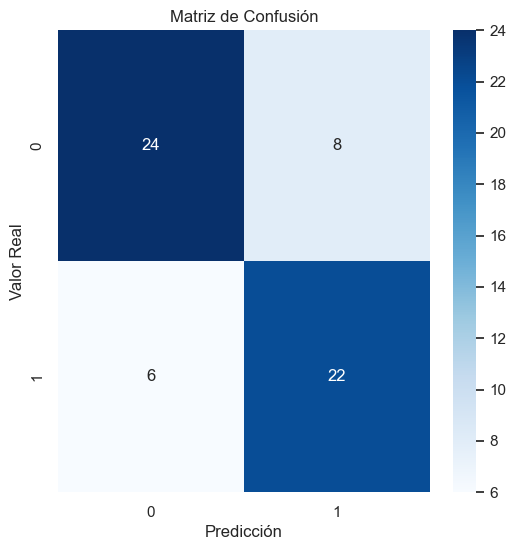

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precisión: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


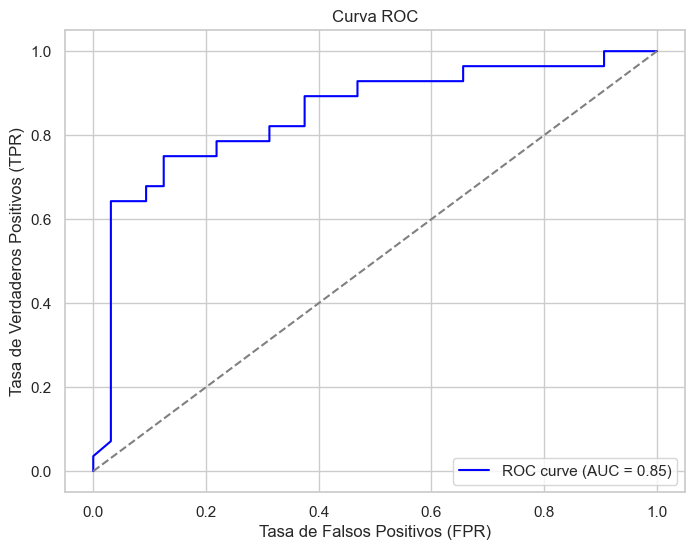

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calcular probabilidades de predicción
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Interpretacion de los resultados
# Una precisión de 0.77 (77%) significa que el modelo predice correctamente el 77% de los casos.
# Aunque no es un rendimiento espectacular, puede considerarse aceptable.  Sin embargo, en este caso, que es un ámbito médico, donde las consecuencias de una predicción incorrecta pueden ser graves, es preferible tener una precisión más alta.

# Recall:
# Mide la capacidad del modelo para identificar correctamente los casos positivos (enfermedad cardíaca).
# El recall de 0.79 significa que el modelo identifica el 79% de los pacientes con enfermedad cardíaca.

# F1-Score:
# Es el promedio ponderado de la precisión y el recall.
# El F1-Score de 0.76 indica un equilibrio razonable entre precisión y recall.
# Sin embargo, para problemas médicos, un F1-Score de 0.76 puede considerarse insuficiente, especialmente si estamos perdiendo muchos casos positivos (falsos negativos).
